# Predicting Sale Prices for Ames Iowa Housing Dataset

#### By: Julia Kelman: [GitHub](https://git.generalassemb.ly/julia-kelman/)

## Problem Statement

We are a property management company providing services through an App for individuals who own multiple real estate properties. Our services include management, repairs, rent collection AND a portfolio feature that allows our clients to track the value of their properties.  
We are looking to expand to a new market and our sales team discovered that real estate, rental, and leasing is the number 4 industry contributing to the Iowa Gross Domestic Product ([source](https://www.iowadatacenter.org/quickfacts)). Since Ames, IA is the home of Iowa State University ([source](https://en.wikipedia.org/wiki/Ames,_Iowa)) and largely populated by students, we expect a large number of rental properties in this city which makes it the perfect place to roll out our App.  

We need to predict house prices with the highest level of accuracy for the portfolio feature of our App.  
We plan to solve this problem by using the Ames Housing Dataset to build a regression model able to predict house prices with the highest R^2 and lowest RMSE.   
This model will inform which features our employees should record data on during their monthly inspections. 

## Executive Summary

Our goal is to build a model able to predict Ames, IA house prices with the highest predictive power for the portfolio feature of our App. In order to do so, the [Ames Housing Dataset](https://git.generalassemb.ly/julia-kelman/project_2/blob/master/datasets/train.csv) was used. This dataframe contains information provided by the Ames Iowa Assessor's Office and contains assessments of individual residential properties sold in Ames, IA from 2006 to 2010. To compile this dataset 2930 properties were assessed and 81 variables were provided for each of those homes. For a detailed list and description of those variables refer to the original [data dictionary](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt).  
A small portion of this dataset was reserved for a Kaggle competition and included in a [validation set](https://git.generalassemb.ly/julia-kelman/project_2/blob/master/datasets/test.csv). As a result our work was done on a subset of 2051 of those observations.  
The dataframe was cleaned, making sure to reformat any variables with data points wrongly assigned a null value. Non-numeric ordinal variables were reformated as well in order to be tranformed into numerical features. Dummy variables were created from the remaining non-numeric features in order to be included in our model. Finally, 2 new features were engineered.  
Exploratory analysis including summary statistics was performed to identify trends in the data. Data visualization tools were then used to visualize those trends and identify specific features that may be highly correlated to our target variable of sale price. Four models were tested: a baseline model, a linear regression model, a ridge model and a lasso model. The models were compared using R-squared and RMSE and the Lasso model was selected as the best preditive model. Further evaluation of the lasso model's performance and errors was performed.  
We concluded that a Lasso Regression model with most features included (75 variables: 73 of the 81 originals and 2 engineered) gives us the highest predictive power. We recommended that data be collected on all of those features during our montly home inspections. Additional specific recommendations concerning which feature to focus on during those assessments and the need for procedures during data collection were made. 


## Table of Contents 

- [Ames Housing Data Import](#Loading-Data) 
- [Data Cleaning](#Data-Cleaning) 
- [Exploratory Data Analysis](#EDA) 
- [Model Preparation](#Model-Preparation)
- [Modeling](#Modeling)  
    - [Baseline Model](#Baseline-Model)  
    - [Linear Regression](#Linear-Regression)  
    - [Ridge](#Ridge)  
    - [Lasso](#Lasso)  
- [Model Selection](#Model-Selection)
    - [Predictions](#Calculating-Predictions)
    - [RMSE](#Calculating-RMSE)
    - [R-Squared](#Calculating-R^2)
    - [Model Comparaison](#Model-Comparaison)
- [Model Evaluation](#Model-Evaluation)
- [Conclusion & Recommendations](#Conclusion-and-Recommendations)
- [References](#References)
- [Kaggle Submission](#Kaggle-Submission)


## Loading Data

In [1]:
import warnings
warnings.filterwarnings("ignore") # Shhhh
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor

%matplotlib inline

In [2]:
# Reading the training dataset: 
df = pd.read_csv('../datasets/train.csv') 

In [3]:
# Reading the Kaggle validation dataset: 
val = pd.read_csv('../datasets/test.csv')  

In [4]:
# Setting display options 
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

In [5]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
df.shape

(2051, 81)

## Data Cleaning

In [7]:
# Investigating nulls 
df.isnull().sum().sum()

9822

According to information from the original data dictionary, many features' 'NA' are actually a way of encoding valid data. Those features need to be reformated. For other features (where NAs are actual missing values) we need to impute the mean or mode depending on the data type.

During the cleaning process, every feature was investigated and cleaned. The steps taken were compiled into the following function:

In [8]:
def format_data_cleaning(df_train, df_holdout): 
    # Removing NaNs that actually have meaning:
    df_train['Alley'] = df_train['Alley'].map({np.nan: 'No_alley', 'Pave':'Pave', 'Grvl':'Grvl'})
    df_train['Bsmt Qual'] = df_train['Bsmt Qual'].map({np.nan: 0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    df_train['Bsmt Cond'] = df_train['Bsmt Cond'].map({np.nan: 0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    df_train['Bsmt Exposure'] = df_train['Bsmt Exposure'].map({np.nan: 0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
    df_train['BsmtFin Type 1'] = df_train['BsmtFin Type 1'].map({np.nan: 0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
    df_train['BsmtFin Type 2'] = df_train['BsmtFin Type 2'].map({np.nan: 0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
    df_train['Fireplace Qu'] = df_train['Fireplace Qu'].map({np.nan: 0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    df_train['Garage Type'] = df_train['Garage Type'].map({np.nan: 'No Garage', 'Detchd':'Detchd', 'CarPort':'CarPort', 'BuiltIn':'BuiltIn', 'Basment':'Basment', 'Attchd':'Attchd', '2Types':'2Types'})
    df_train['Garage Finish'] = df_train['Garage Finish'].map({np.nan: 0, 'Unf':1, 'RFn':2, 'Fin':3})    
    df_train['Garage Qual'] = df_train['Garage Qual'].map({np.nan: 0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    df_train['Garage Cond'] = df_train['Garage Cond'].map({np.nan: 0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    df_train['Pool QC'] = df_train['Pool QC'].map({np.nan: 0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
    df_train['Fence'] = df_train['Fence'].map({np.nan: 'No Fence', 'MnWw':'MnWw', 'GdWo':'GdWo', 'MnPrv':'MnPrv', 'GdPrv':'GdPrv'})
    df_train['Misc Feature'] = df_train['Misc Feature'].map({np.nan: 'None', 'TenC':'TenC', 'Shed':'Shed', 'Othr':'Othr', 'Gar2':'Gar2', 'Elev':'Elev'})
    # Fixing Datatypes: 
    df_train['Id'] = df_train['Id'].astype(str)
    df_train['PID'] = df_train['PID'].astype(str)
    df_train['MS SubClass'] = df_train['MS SubClass'].astype(str)
    # Inputing mean/mode for remaining NaNs: 
    for column in df_train.columns:
        if df_train[column].dtype != 'O':
            df_train[column].fillna(df_train[column].mean(), inplace=True)
        else: 
            df_train[column].fillna(df_train[column].mode(), inplace=True)
    #Dealing with Mas Vnr Type feature: 
    df_train['Mas Vnr Type'].fillna('None', inplace=True)
    
    # Removing NaNs that actually have meaning:
    df_holdout['Alley'] = df_holdout['Alley'].map({np.nan: 'No_alley', 'Pave':'Pave', 'Grvl':'Grvl'})
    df_holdout['Bsmt Qual'] = df_holdout['Bsmt Qual'].map({np.nan: 0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    df_holdout['Bsmt Cond'] = df_holdout['Bsmt Cond'].map({np.nan: 0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    df_holdout['Bsmt Exposure'] = df_holdout['Bsmt Exposure'].map({np.nan: 0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
    df_holdout['BsmtFin Type 1'] = df_holdout['BsmtFin Type 1'].map({np.nan: 0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
    df_holdout['BsmtFin Type 2'] = df_holdout['BsmtFin Type 2'].map({np.nan: 0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
    df_holdout['Fireplace Qu'] = df_holdout['Fireplace Qu'].map({np.nan: 0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    df_holdout['Garage Type'] = df_holdout['Garage Type'].map({np.nan: 'No Garage', 'Detchd':'Detchd', 'CarPort':'CarPort', 'BuiltIn':'BuiltIn', 'Basment':'Basment', 'Attchd':'Attchd', '2Types':'2Types'})
    df_holdout['Garage Finish'] = df_holdout['Garage Finish'].map({np.nan: 0, 'Unf':1, 'RFn':2, 'Fin':3})    
    df_holdout['Garage Qual'] = df_holdout['Garage Qual'].map({np.nan: 0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    df_holdout['Garage Cond'] = df_holdout['Garage Cond'].map({np.nan: 0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    df_holdout['Pool QC'] = df_holdout['Pool QC'].map({np.nan: 0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
    df_holdout['Fence'] = df_holdout['Fence'].map({np.nan: 'No Fence', 'MnWw':'MnWw', 'GdWo':'GdWo', 'MnPrv':'MnPrv', 'GdPrv':'GdPrv'})
    df_holdout['Misc Feature'] = df_holdout['Misc Feature'].map({np.nan: 'None', 'TenC':'TenC', 'Shed':'Shed', 'Othr':'Othr', 'Gar2':'Gar2', 'Elev':'Elev'})
    # Fixing Datatypes: 
    df_holdout['Id'] = df_holdout['Id'].astype(str)
    df_holdout['PID'] = df_holdout['PID'].astype(str)
    df_holdout['MS SubClass'] = df_holdout['MS SubClass'].astype(str)
    # Inputing mean for remaining NaNs: 
    for column in df_holdout.columns:
        if df_holdout[column].dtype != 'O':
            df_holdout[column].fillna(df_train[column].mean(), inplace=True)
        else: 
            df_holdout[column].fillna(df_train[column].mode(), inplace=True)
    #Dealing with Mas Vnr Type and Electrical features: 
    df_holdout['Mas Vnr Type'].fillna('None', inplace=True)
    df_holdout['Electrical'].fillna('SBrkr', inplace=True) #'SBrKr' is the mode of the training datatset for this feature

In [9]:
# Cleaning our dataframe:
format_data_cleaning(df, val)

In [10]:
# Confirming there are no more nulls 
df.isnull().sum().sum()

0

There are no more missing values in our dataset.

In [11]:
# A maximum year of 2207 does not make sense. Let's invistigate further to see if this data can be corrected.
df['Garage Yr Blt'].sort_values(ascending=False).head()

1699    2207.0
1241    2010.0
144     2010.0
1732    2009.0
1700    2009.0
Name: Garage Yr Blt, dtype: float64

In [12]:
# Let's take a closer look at the 1699 row 
df.loc[1699, :]
# Considering that the house was built in 2006 and remodeled in 2007. It is a safe assumption to make that 2207 should be 2007.

Id                      2261
PID                916384070
MS SubClass               20
MS Zoning                 RL
Lot Frontage              68
Lot Area                8298
Street                  Pave
Alley               No_alley
Lot Shape                IR1
Land Contour             HLS
Utilities             AllPub
Lot Config            Inside
Land Slope               Gtl
Neighborhood          Timber
Condition 1             Norm
Condition 2             Norm
Bldg Type               1Fam
House Style           1Story
Overall Qual               8
Overall Cond               5
Year Built              2006
Year Remod/Add          2007
Roof Style               Hip
Roof Matl            CompShg
Exterior 1st         VinylSd
Exterior 2nd         VinylSd
Mas Vnr Type            None
Mas Vnr Area         99.6959
Exter Qual                Gd
Exter Cond                TA
Foundation             PConc
Bsmt Qual                  4
Bsmt Cond                  3
Bsmt Exposure              3
BsmtFin Type 1

In [13]:
# Correcting the erroneous Garage year built datapoint 
df.loc[1699, 'Garage Yr Blt'] = 2007

In order to be in an appropriate format to be included in a model, the data needs to be numeric.  
As a result, more features need to be reformated.

In [14]:
# Creating function to reproduce data cleaning and formating: 
def format_model_prep(dataframe): 
    dataframe['Lot Shape'] = dataframe['Lot Shape'].map({'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3':3})
    dataframe['Utilities'] = dataframe['Utilities'].map({'ELO': 1, 'NoSeWa': 2, 'NoSewr': 3, 'AllPub':4})
    dataframe['Land Slope'] = dataframe['Land Slope'].map({'Gtl':1, 'Mod':2, 'Sev':3})
    dataframe['Central Air'] = dataframe['Central Air'].map({'Y':1, 'N':0})
    dataframe['Functional'] = dataframe['Functional'].map({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8})
    dataframe['Heating QC'] = dataframe['Heating QC'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    dataframe['Exter Qual'] = dataframe['Exter Qual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    dataframe['Exter Cond'] = dataframe['Exter Cond'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    dataframe['Kitchen Qual'] = dataframe['Kitchen Qual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    dataframe['Paved Drive'] = dataframe['Paved Drive'].map({'N':0, 'P':1, 'Y':2})
    dataframe['Age'] = dataframe['Yr Sold'] - df['Year Remod/Add']
    dataframe['True TotRms AbvGrd'] =  dataframe['TotRms AbvGrd'] + df['Full Bath'] + df['Half Bath'] 

In [15]:
# Formating our dataframe:
format_model_prep(df)

In [16]:
# Confirming data types
df.dtypes

Id                     object
PID                    object
MS SubClass            object
MS Zoning              object
Lot Frontage          float64
Lot Area                int64
Street                 object
Alley                  object
Lot Shape               int64
Land Contour           object
Utilities               int64
Lot Config             object
Land Slope              int64
Neighborhood           object
Condition 1            object
Condition 2            object
Bldg Type              object
House Style            object
Overall Qual            int64
Overall Cond            int64
Year Built              int64
Year Remod/Add          int64
Roof Style             object
Roof Matl              object
Exterior 1st           object
Exterior 2nd           object
Mas Vnr Type           object
Mas Vnr Area          float64
Exter Qual              int64
Exter Cond              int64
Foundation             object
Bsmt Qual               int64
Bsmt Cond               int64
Bsmt Expos

The data is now in appropriate type. 

In [17]:
# Confirming the format
df.describe()

,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Misc Val,Mo Sold,Yr Sold,SalePrice,Age,True TotRms AbvGrd
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,69.055200,10065.208191,0.404193,3.998537,1.052657,6.112140,5.562165,1971.708922,1984.190151,99.695909,3.406143,3.085812,3.490005,2.929303,1.628961,3.564603,442.300488,1.274500,47.959024,567.728293,1057.987805,4.158459,0.931253,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,3.517309,6.435885,7.843003,0.590931,1.763530,1978.610282,1.723062,1.776585,473.671707,2.803023,2.810336,1.833740,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,0.010726,51.574354,6.219893,2007.775719,181469.701609,23.585568,8.384203
std,21.306357,6742.488909,0.566514,0.049365,0.244264,1.426271,1.104497,30.177889,21.036250,174.021770,0.587962,0.372792,0.901637,0.572009,1.079440,2.125592,461.091621,0.949571,164.960652,444.846247,449.301078,0.964112,0.253085,396.446923,425.671046,51.068870,500.447829,0.522418,0.251582,0.549279,0.501043,0.826618,0.209790,0.665577,1.560225,0.683409,0.638516,1.807074,24.211852,0.898969,0.764351,215.881887,0.721253,0.716094,0.534792,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,0.173576,573.393985,2.744736,1.312014,79258.659352,21.021078,2.119739
min,21.000000,1300.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,0.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000,-2.000000,3.000000
25%,60.000000,7500.000000,0.000000,4.000000,1.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,220.000000,793.000000,3.000000,1.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,5.000000,8.000000,0.000000,0.000000,1962.000000,1.000000,1.000000,319.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000,4.000000,7.000000
50%,69.055200,9430.000000,0.000000,4.000000,1.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,3.000000,3.000000,4.000000,3.000000,1.000000,4.000000,368.000000,1.000000,0.000000,475.000000,995.000000,5.000000,1.000000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,3.000000,6.000000,8.000000

In [18]:
df.shape

(2051, 83)

## EDA

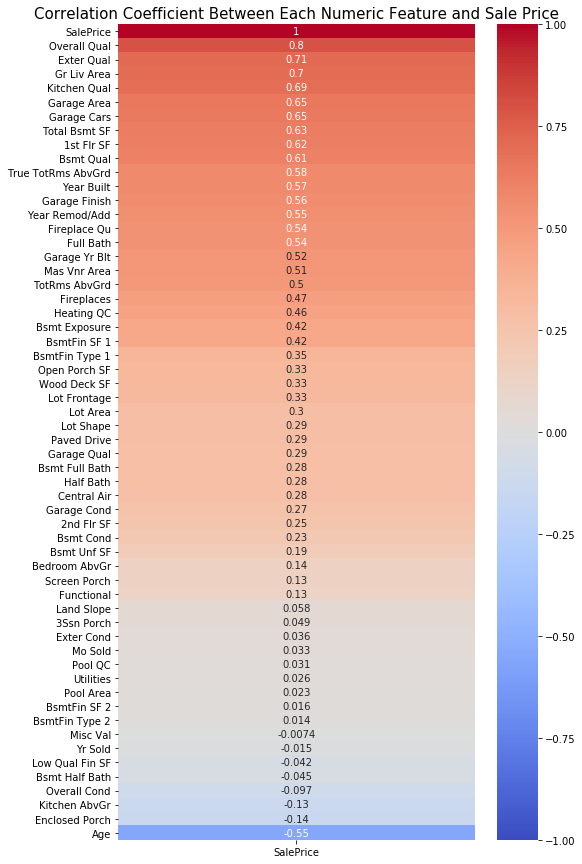

In [19]:
# Correlation heatmap to identify features with strongest correlation to our target 
plt.figure(figsize=(8, 15))
sns.heatmap(df.corr()[['SalePrice']].sort_values('SalePrice', ascending=False), 
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            annot=True);
plt.title('Correlation Coefficient Between Each Numeric Feature and Sale Price', size=15);
# Code for this graph has been adapted from Riley Dallas' code

**Interpretation**: The 10 numerical features with the highest correlation with Sale Price:  
1. Overall Quality 
1. External Quality
1. Above ground living area Sq Ft(Gr Liv Area)  
1. Kitchen Quality
1. Garage Area  
1. Garage Cars  
1. Total Basement Sq Ft
1. 1st Floor Sq Ft
1. Basement Quality
1. True Total Rooms Above Ground (True TotRms AbvGrd)

Note:
- Our employees should pay particular attention to those features during monthly assessments.  
- We will focus on those 10 features for further EDA/visualization. (More features were investigated during our original EDA, however since the trends observed are similar to the top 10 features we will only include those here). 

In [20]:
# Creating a list with the 10 features mentioned above:
features_num = ['Overall Qual', 'Exter Qual', 'Gr Liv Area', 'Kitchen Qual', 'Garage Area', 'Garage Cars', 
                'Total Bsmt SF', '1st Flr SF', 'Bsmt Qual', 'True TotRms AbvGrd']

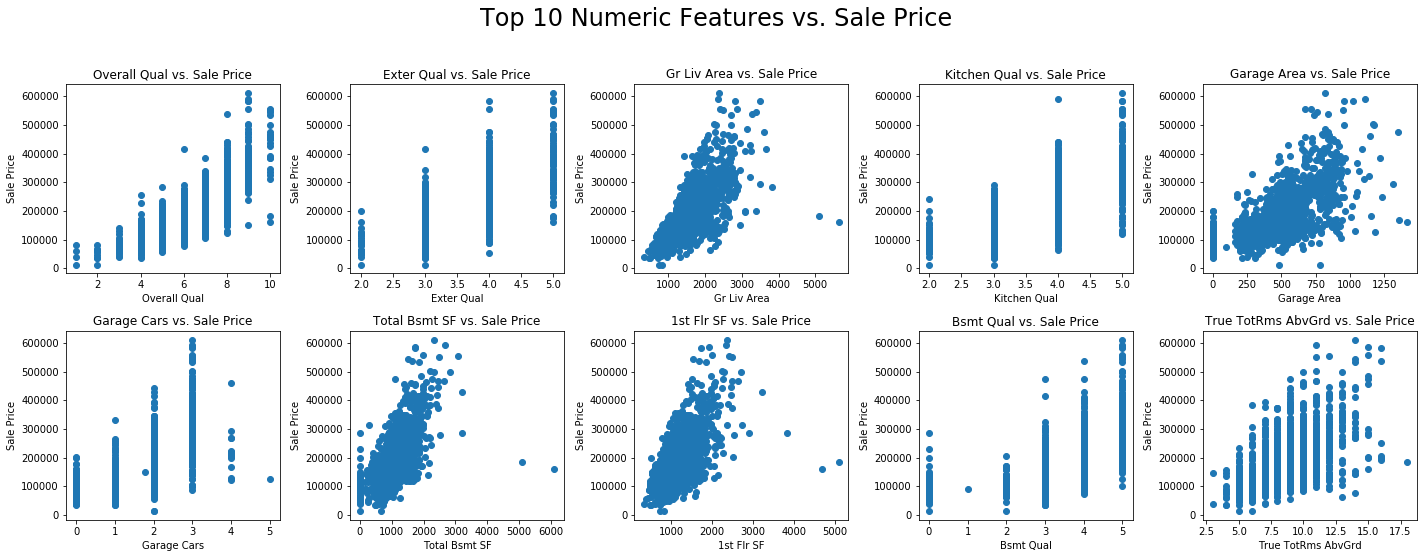

In [21]:
# Creating scatter plots to visualize the relationship between the top 10 numeric features and our target Sale Price:
cols = features_num
fig, axes = plt.subplots(figsize = (20,7), nrows = 2, ncols = 5)
fig.suptitle("Top 10 Numeric Features vs. Sale Price", fontsize = 24, y = 1.1)

axes = axes.flatten()

for i, col in enumerate(cols):
    ax = axes[i]
    ax.scatter(df[col], df["SalePrice"])
    ax.set_ylabel("Sale Price")
    ax.set_xlabel(col)
    ax.set_title(f"{col} vs. Sale Price")

plt.tight_layout()
#Code adapted from Mahdi Shadkam-Farrokhi's bonus visualization local lesson for GA DSI 11

**Interpretation:**  
Only Overall quality, above ground living area (Gr Liv Area), Garage area,  Total basement SF and 1st Floor SF seem to have a linear relationship with Sale Price. However, we notice that the data gets more widely distributed for larger values.

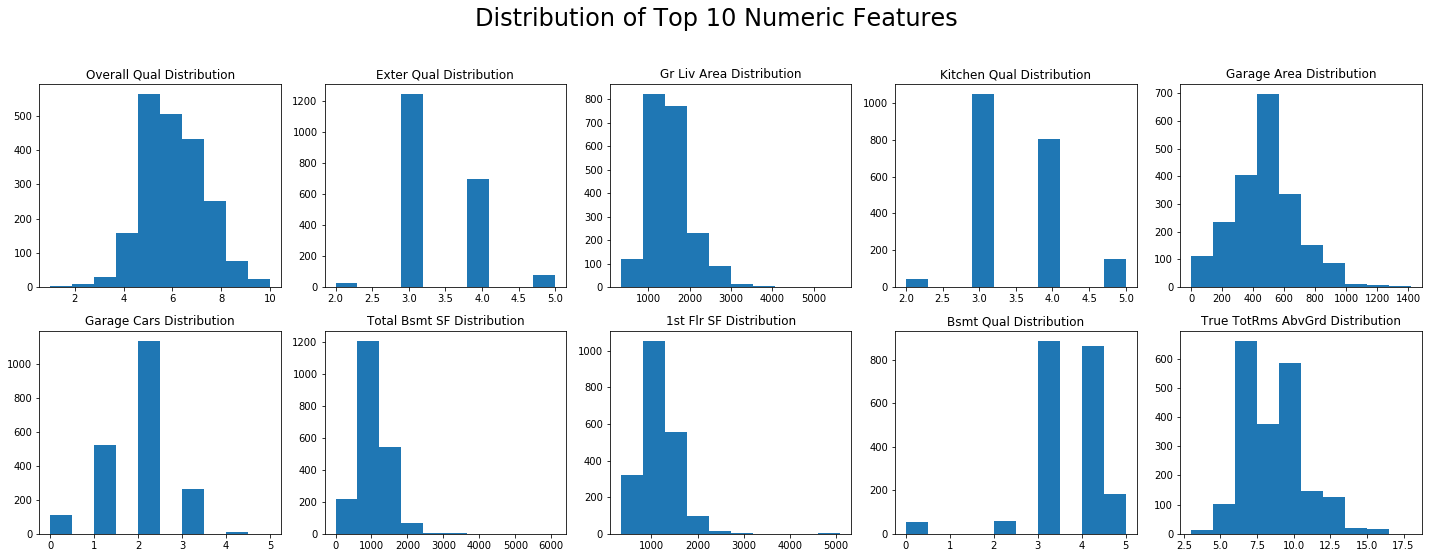

In [22]:
# Creating histograms to visualize the distribution of the top 10 numeric features:
cols = features_num
fig, axes = plt.subplots(figsize = (20,7), nrows = 2, ncols = 5)
fig.suptitle("Distribution of Top 10 Numeric Features", fontsize = 24, y = 1.1)
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = axes[i]
    ax.hist(df[col])
    ax.set_title(f"{col} Distribution")

plt.tight_layout()
#Code adapted from Mahdi Shadkam-Farrokhi's bonus visualization local lesson for GA DSI 11

**Interpretation:** None of the features seem to have a true normal distribtion.
Overall Quality, Gr Liv Area, Garage Area, Garage cars, Total Basement SF, and  1st Floor SF are the only features with a distribution close to normal. However, they all have a right skewed (except for Overall Quality).
  
  Note: In order to improve our model, the log of the two most strongly correlated features with a close to normal distribution (Overall quality and Above ground living area) was taken. However, this transformation did not improve our model enough to be included in the final model.  

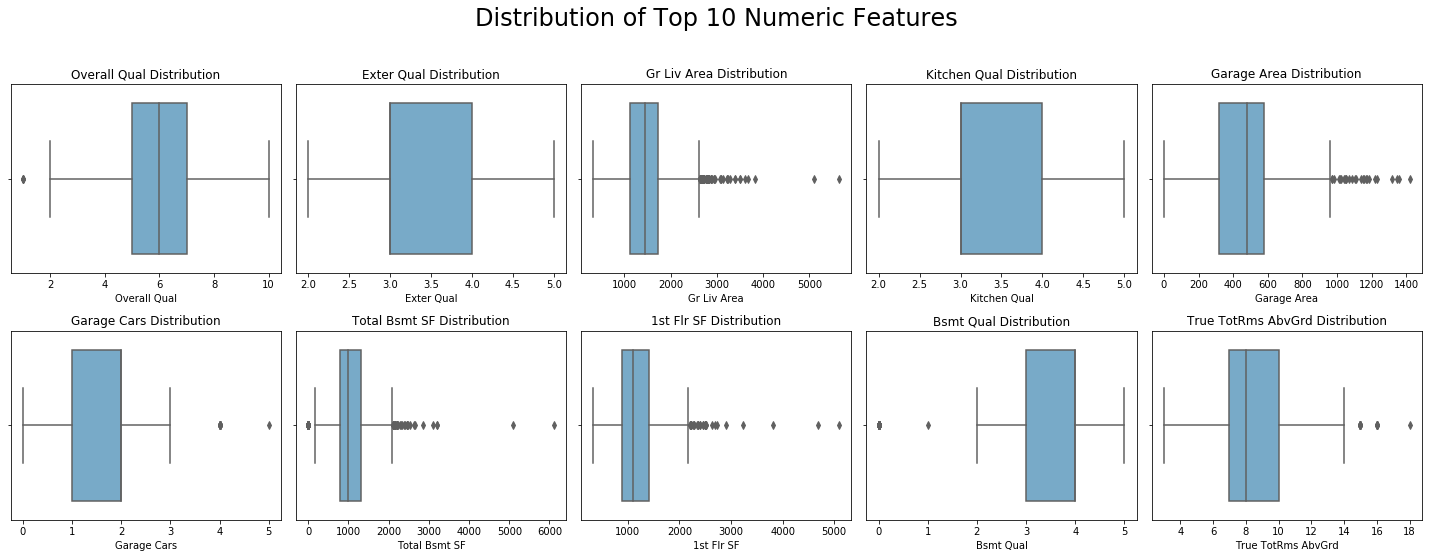

In [23]:
# Creating boxplots to visualize the distribution of the top 10 numeric features:
# Boxplots allow us to better visualize outliers 
cols = features_num
fig, axes = plt.subplots(figsize = (20,7), nrows = 2, ncols = 5)
fig.suptitle("Distribution of Top 10 Numeric Features", fontsize = 24, y = 1.1)
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(df[col], ax = axes[i], palette='Blues').set_title(f"{col} Distribution")
    
plt.tight_layout()

**Interpretation**: We notice several outliers. However, contrary to the Year Garage Built outlier dealt with during data cleaning, we do not have enough information to say that those values truly are invalid observations. Therefore, we will keep them in our dataset and include them in our model. 

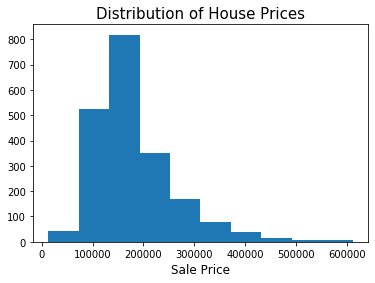

In [24]:
# Visualizing the distribution of our target variable:
plt.hist(df['SalePrice']);
plt.title('Distribution of House Prices', size=15)
plt.xlabel('Sale Price', size=12);

**Interpretation:** The distribution of sale prices is right skewed. This suggests that we will need to take the log of our target feature in our model in order to improve it's predictive power. 

In [25]:
# Finally, let's dummy the remaining categorical features:
df = pd.get_dummies(df, columns = ['Neighborhood', 'MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config', 
                                   'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 
                                  'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Electrical', 
                                   'Garage Type', 'Fence', 'Misc Feature', 'Sale Type', 'Mo Sold'])

In [26]:
# Saving cleaned dataset: 
df.to_csv('../output/cleaned_dataframe.csv', index = False)

Based on the depth of this dataset, we are likely to be able to answer our problem statement.

## Model Preparation

In [27]:
# Setting our X and y variables 
X = df.drop(columns = ['SalePrice', 'Id', 'PID', 'Yr Sold', 'Year Remod/Add', 'TotRms AbvGrd', 'Full Bath', 'Half Bath'])
y = np.log(df['SalePrice'])

# Doing a train/test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5)

In [28]:
# Scaling our data 
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

## Modeling

### Baseline Model

In [29]:
# Instantiating our baseline model: 
dummy_mean = DummyRegressor(strategy='mean')

# Fitting our baseline model: 
dummy_mean.fit(X_train_sc, y_train)

# Calculating training and testing scores: 
print(f' Training Score: {dummy_mean.score(X_train_sc, y_train)}')
print(f' Testing Score: {dummy_mean.score(X_test_sc, y_test)}')
# Code from https://chrisalbon.com/machine_learning/model_evaluation/create_baseline_regression_model/

 Training Score: 0.0
 Testing Score: -0.013575997868034763


### Linear Regression

In [30]:
# Instantiating our linear regression model:
lr = LinearRegression()

In [31]:
# Fitting our linear regression model:
lr.fit(X_train_sc, y_train)

# Training score 
print(f' Training Score: {lr.score(X_train_sc, y_train)}')
      
#Testing score
print(f' Testing Score: {lr.score(X_test_sc, y_test)}')

 Training Score: 0.9456326052636992
 Testing Score: -6.307224752956732e+19


In [32]:
# Calculating cross val score 
cross_val_score(lr, X_train_sc, y_train, cv=5).mean()

-1.7574356267637247e+24

Note: Although bad testing scores for such an overfit model are expected, those values seem abnormal and the model is currently under review. 

### Ridge

In [33]:
# Creating a list of potential alphas:
r_alphas = np.logspace(1, 4, 100)

# Instantiating our ridge model and cross-validating over our list of ridge alphas:
ridge_cv = RidgeCV(
          alphas = r_alphas,
          scoring= 'r2', 
          cv = 5)

# Fitting our ridge model using best ridge alpha:
ridge_cv.fit(X_train_sc, y_train);

In [34]:
# Confirming that best ridge alpha was well within the range of potential alphas: 
ridge_cv.alpha_

572.236765935022

In [35]:
# Calculating training and testing scores: 
print(f'Training Score: {ridge_cv.score(X_train_sc, y_train)}') 
print(f'Testing Score: {ridge_cv.score(X_test_sc, y_test)}')

Training Score: 0.9297350006454732
Testing Score: 0.8959815569147925


In [36]:
# Calculating cross val score: 
cross_val_score(ridge_cv, X_train_sc, y_train, cv=5).mean()

# Cross val score is reasonably close to our testing score, indicating a valid testing set 

0.8666697865097255

### Lasso

In [37]:
# Creating a list of potential alphas:
l_alphas = np.logspace(-5, 0, 100)

# Instantiating our lasso model and cross-validating over our list of Lasso alphas:
lasso_cv = LassoCV( 
                alphas = l_alphas,
                cv=5)

# Fitting our lasso model using best ridge alpha:
lasso_cv.fit(X_train_sc, y_train);

In [38]:
# Confirming that best lasso alpha was well within the range of potential alphas: 
lasso_cv.alpha_

0.006734150657750821

In [39]:
# Calculating training and testing scores: 
print(f'Training Score: {lasso_cv.score(X_train_sc, y_train)}')
print(f'Testing Score: {lasso_cv.score(X_test_sc, y_test)}')

Training Score: 0.9255887711632917
Testing Score: 0.9140846494752666


In [40]:
# Calculating cross-val-score:
cross_val_score(lasso_cv, X_train_sc, y_train, cv=5).mean()

# Cross val score is reasonably close to our testing score, indicating a valid testing set 

0.8552090660571563

## Model Selection

### Calculating Predictions

In [41]:
# Getting y_test back to the original scale:
y_test_os = np.exp(y_test)
y_test_os[:2]

556    199500.0
176    183200.0
Name: SalePrice, dtype: float64

In [42]:
# Getting predictions for the baseline: 
pred_bas = np.exp(y_train.mean())  #our baseline predicts the mean
pred_bas

164831.56168113885

In [43]:
# Getting predictions for the Lasso training set: 
pred_l_train_log = lasso_cv.predict(X_train_sc)
pred_lasso_train = np.exp(pred_l_train_log)
pred_lasso_train[:4]

array([220467.11187502, 189907.05620968,  96692.02354621, 177254.54100106])

In [44]:
# Getting predictions for the Lasso testing set:
pred_l_test_log = lasso_cv.predict(X_test_sc)
pred_lasso_test = np.exp(pred_l_test_log)
pred_lasso_test[:4]

array([177162.07989634, 188745.73193211, 166480.48221339,  83309.89602418])

In [45]:
# Getting predictions for the Ridge training set:
pred_r_train_log = ridge_cv.predict(X_train_sc)
pred_ridge_train = np.exp(pred_r_train_log)
pred_ridge_train[:4]

array([244267.76696748, 191119.00587414,  90053.83952638, 180213.75965204])

In [46]:
# Getting predictions for the Ridge testing set:
pred_r_test_log = ridge_cv.predict(X_test_sc)
pred_ridge_test = np.exp(pred_r_test_log)
pred_ridge_test[:4]

array([179164.84603466, 197135.61213549, 174535.39529456,  88689.07013596])

### Calculating RMSE

In [47]:
# Creating a function to automate RMSE calculation:
def get_rmse(y, model_prediction):
    mse = metrics.mean_squared_error(y, model_prediction)
    rmse = np.sqrt(mse)
    return print(f' The RMSE is {rmse}')

In [48]:
# Baseline RMSE
get_rmse(np.exp(y_train), np.exp(dummy_mean.predict(X_train)))
get_rmse(np.exp(y_test), np.exp(dummy_mean.predict(X_test)))

 The RMSE is 79557.74676249457
 The RMSE is 85053.23862455781


In [49]:
# Lasso RMSE
get_rmse(np.exp(y_train), pred_lasso_train)
get_rmse(np.exp(y_test), pred_lasso_test)

 The RMSE is 18971.93064345799
 The RMSE is 23558.35250893357


In [50]:
# Ridge RMSE
get_rmse(np.exp(y_train), pred_ridge_train)
get_rmse(np.exp(y_test), pred_ridge_test)

 The RMSE is 19212.6662613521
 The RMSE is 26090.586995693473


### Calculating R^2

R-squared is the default metric for the regression models used and have therefore already been calculated.

### Model Comparaison

<img src="../assets/table.png" width="750px">



We are looking for the model with the higest R-squared and the lowest RMSE. In our case, this is the Lasso model.  
A lasso model makes sense for our particular situation since it zeros out certain features in order to simplify an overfit model. It is therefore the best model when incorportating a very high number of features in a model in order to reduce the variance as much as possible. 

**Interpretation of Lasso scores:**  
- 91% of the variation in sale price is explained by our model (relative to a baseline model with no predictors).
- True prices are approximately \\$23,500 away from our predicted values. 


## Model Evaluation

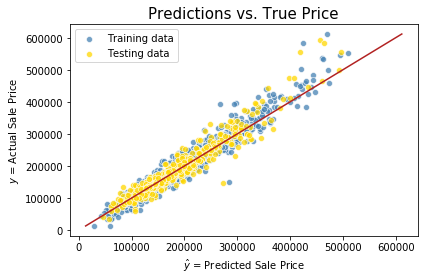

In [51]:
# Visualizing predicted sale prices vs actual sales prices: 
sns.scatterplot(pred_lasso_train, np.exp(y_train), label = "Training data", color = "steelblue", alpha = .75)
sns.scatterplot(pred_lasso_test, y_test_os, label = "Testing data", color = "gold", alpha = .75)
plt.title("Predictions vs. True Price", size=15)
plt.xlabel("$\hat{y}$ = Predicted Sale Price")
plt.ylabel("$y$ = Actual Sale Price")
plt.legend(loc = "upper left")
all_vals = np.concatenate([pred_lasso_train, pred_lasso_test, np.exp(y_train), y_test_os])
the_max_val = np.max(all_vals)
the_min_val = np.min(all_vals)
plt.plot([the_min_val, the_max_val],[the_min_val, the_max_val], c='firebrick')
plt.tight_layout()
#Code adapted from Mahdi Shadkam-Farrokhi's code

**Interpretation:** Our predicted prices are close to the actual prices for both our training and testing data. This suggests that our model has good predictive power. However, it is worth noting that our model is not predicting prices as accurately for the higher price range. This is an area for potential improvement for future iterations of the App. 

In [52]:
# Calculating residuals:
residuals = y_test_os - pred_lasso_test

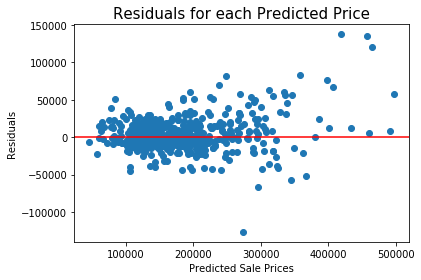

In [53]:
# Visualizing residuals: 
plt.scatter(pred_lasso_test, residuals)
plt.axhline(0, color='red')
plt.title('Residuals for each Predicted Price', size=15)
plt.xlabel('Predicted Sale Prices')
plt.ylabel('Residuals');

**Interpretation:** Our errors when predicting prices for houses worth under \\$250,000 are very acceptable. Once again we note an opportunity for improvement in reducing our errors for the higher price range.  
The wider variation in residuals for higher predicted prices also implies that the equality of variances assumption may be violated. However, based on our problem statement, our goal is to create the model with the highest predictive power. Since we do not care about using our model for inference purposes, violating assumptions is acceptable.  

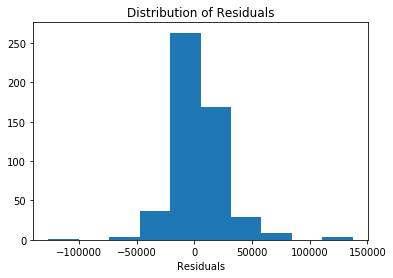

In [54]:
# Visualizing distribution of residuals:
plt.hist(residuals)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals');

**Interpretation:** Our residuals do not follow a true normal distribution. This implies that the normality assumption is not truly fulfilled. However, as mentioned above, violating assumptions is acceptable in our case.  
It is worth noting that considering the number of features included in our model and the close relationship they have with one another, we are most likely violating the independence of predictors assumption as well. In order to mediate this issue, a model including fewer features (to avoid multi-colinear features) was tested but it did not perform as well as the model selected. 

In [55]:
# Looking at our model's intercept: 
lasso_cv.intercept_

12.012679393176295

In [56]:
# Looking at the intercept in the original units: 
np.exp(lasso_cv.intercept_)

164831.56168113885

**Interpretation**: When a home has a value of 0 for all of our model's features, the sale price is estimated to be \\$164,832. 

In [57]:
# Looking at our model coeficients: 
lasso_cv.coef_

array([ 0.00930029,  0.01551156,  0.        ,  0.        ,  0.        ,
        0.09139507,  0.03274282,  0.04051921,  0.        ,  0.01516019,
        0.        ,  0.01519034,  0.        ,  0.012285  ,  0.0068161 ,
        0.02840046,  0.        ,  0.        , -0.        ,  0.01857448,
        0.0121422 ,  0.01281976,  0.02079379,  0.        , -0.        ,
        0.1162041 ,  0.01119069,  0.        ,  0.        , -0.00069686,
        0.01434197,  0.01984045,  0.00380854,  0.0152574 ,  0.00472193,
        0.00017474,  0.01901989,  0.00493496,  0.        ,  0.00726711,
        0.01562731,  0.00162329,  0.        ,  0.        ,  0.        ,
        0.00527777,  0.        ,  0.        , -0.        , -0.01558996,
        0.00549224, -0.        , -0.        , -0.        ,  0.        ,
        0.00050502, -0.        ,  0.0121571 , -0.00031055, -0.        ,
       -0.        ,  0.00548354, -0.        ,  0.        , -0.00587342,
        0.        , -0.        , -0.        , -0.        ,  0.  

In [58]:
coef = pd.DataFrame(lasso_cv.coef_, X.columns)
coef.head()
# Code found thanks to Danielle Medellin

,0
Lot Frontage,0.009300
Lot Area,0.015512
Lot Shape,0.000000
Utilities,0.000000
Land Slope,0.000000


In [59]:
coef[0].sort_values(ascending=False)

Gr Liv Area              0.116204
Overall Qual             0.091395
Year Built               0.040519
Overall Cond             0.032743
BsmtFin SF 1             0.028400
1st Flr SF               0.020794
Functional               0.019840
Garage Cars              0.019020
Total Bsmt SF            0.018574
Paved Drive              0.015627
Lot Area                 0.015512
Fireplace Qu             0.015257
Bsmt Qual                0.015190
Exter Qual               0.015160
Kitchen Qual             0.014342
Central Air              0.012820
Bsmt Exposure            0.012285
Neighborhood_Crawfor     0.012157
Heating QC               0.012142
Bsmt Full Bath           0.011191
Neighborhood_NridgHt     0.010306
Exterior 1st_BrkFace     0.010056
Sale Type_New            0.009975
Lot Frontage             0.009300
Bldg Type_1Fam           0.009017
Garage Cond              0.007267
Foundation_PConc         0.007095
BsmtFin Type 1           0.006816
Neighborhood_Somerst     0.005516
True TotRms Ab

The five features with the highest coefficients are:  
1. Above Ground Living Area
1. Overall Quality
1. Year Built 
1. Overall COndition
1. Finished Basement 1 Sq Ft  

**Interpretation:** A 1 unit increase in those features leads to the biggest expected increase in sale price (all else held constant).

## Conclusion and Recommendations 


A Lasso Regression model with most features included (75 variables: 73 of the 81 originals and 2 engineered) gives us the highest predictive power.  

We recommend that data be collected on all of those features in order to have the highest predictive power. We recognize that collecting data on 75 variables may seem tedious. However, only 17 features are subject to change after initial assessment. We recommend to confirm with the operations team if they belive a lengthy initial assessment followed by shorter monthly assessments of those 17 features is reasonable.  
In addition, we recommend to create a procedure for employees to collect data on those variables during the monthly assessments. Indeed, many of those features are qualitative in nature and all employees must assess them using the same approach in order for the values to be valid.  
Finally, special attention should be given to the features with high correlation and high model coeficients identified above during those assessments. 


## References

[Iowa Quick Facts](https://www.iowadatacenter.org/quickfacts)  
[Ames, IA Wikipedia](https://en.wikipedia.org/wiki/Ames,_Iowa)  
[Data Dictionary](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

---

# Kaggle Submission

In [60]:
val.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0000,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,2,3,1,1,0,1,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,0,Detchd,1910.0,1,1,440,1,1,Y,0,60,112,0,0,0,0,No Fence,None,0,4,2006,WD
1,2718,905108090,90,RL,69.0552,9662,Pave,No_alley,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,4,3,1,1,0,1,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,0,Attchd,1977.0,3,2,580,3,3,Y,170,0,0,0,0,0,0,No Fence,None,0,8,2006,WD
2,2414,528218130,60,RL,58.0000,17104,Pave,No_alley,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,4,4,3,6,554,1,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,4,Attchd,2006.0,2,2,426,3,3,Y,100,24,0,0,0,0,0,No Fence,None,0,9,2006,New
3,1989,902207150,30,RM,60.0000,8520,Pave,No_alley,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,3,3,1,1,0,1,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,0,Detchd,1935.0,1,2,480,2,3,N,0,0,184,0,0,0,0,No Fence,None,0,7,2007,WD
4,625,535105100,20,RL,69.0552,9500,Pave,No_alley,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,4,3,1,4,609,1,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,4,Attchd,1963.0,2,2,514,3,3,Y,0,76,0,0,185,0,0,No Fence,None,0,7,2009,WD


In [61]:
# Creating dummy variables 
val = pd.get_dummies(val, columns = ['Neighborhood', 'MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config', 
                                   'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 
                                  'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Electrical', 
                                   'Garage Type', 'Fence', 'Misc Feature', 'Sale Type', 'Mo Sold'])

In [62]:
# Formating validation set 
format_model_prep(val)

In [63]:
# Confirming no null values: 
val.isnull().sum().sum()

0

In [64]:
df.shape

(2051, 255)

In [65]:
val.shape

(878, 242)

In [66]:
# Looking for columns included in the testing set that are not in the validations set:
missing_cols = set(X_train.columns) - set(val.columns)
missing_cols

{'Condition 2_Artery',
 'Condition 2_PosN',
 'Condition 2_RRAe',
 'Condition 2_RRAn',
 'Condition 2_RRNn',
 'Electrical_Mix',
 'Exterior 1st_CBlock',
 'Exterior 1st_ImStucc',
 'Exterior 1st_Stone',
 'Exterior 2nd_Stone',
 'Heating_OthW',
 'Heating_Wall',
 'MS SubClass_150',
 'MS Zoning_A (agr)',
 'Misc Feature_Elev',
 'Misc Feature_TenC',
 'Neighborhood_GrnHill',
 'Neighborhood_Landmrk',
 'Roof Matl_ClyTile',
 'Roof Matl_Membran'}

In [67]:
# Including the missing columns in the validation set, with a value of 0:
for col in missing_cols:
    val[col] = 0 

In [68]:
# Filtering our validation set to match our X_train: 
filtered_val = val.drop(columns = ['Id', 'PID', 'Yr Sold', 'Year Remod/Add', 'TotRms AbvGrd', 'Full Bath', 'Half Bath'])

In [69]:
X_train.shape

(1538, 247)

In [70]:
filtered_val.shape

(878, 255)

In [71]:
# Looking for columns that are included in the validation set but not in the training set: 
disc_col = set(filtered_val.columns) - set(X_train.columns)
disc_col

{'Exterior 1st_PreCast',
 'Exterior 2nd_Other',
 'Exterior 2nd_PreCast',
 'Heating_Floor',
 'Mas Vnr Type_CBlock',
 'Roof Matl_Metal',
 'Roof Matl_Roll',
 'Sale Type_VWD'}

In [72]:
# Dropping those columns as our model was not trained on those features:  
filtered_val.drop(columns = disc_col, inplace=True)

In [73]:
# Confirming shape:
filtered_val.shape

(878, 247)

In [74]:
# Making sure that the columns are in the correct order to match the training set: 
filtered_val = filtered_val[X.columns]

In [75]:
# Scaling our data: 
filtered_val_sc = ss.transform(filtered_val)

In [76]:
# Generating predictions: 
preds_val = lasso_cv.predict(filtered_val_sc)

In [77]:
# Transforming predictions back to the original unit: 
preds_original_scale = np.exp(preds_val)

In [78]:
preds_original_scale[:10]

array([122622.20530917, 166837.52019379, 216115.24867378, 102930.72575361,
       173449.7829245 ,  97946.83800182, 109580.1074122 , 146787.30392668,
       171712.49843022, 159056.18633002])

In [79]:
# We need to submit to Kaggle in the appropriate form of .csv 

# create prediction Series
preds_col = pd.Series(preds_original_scale, name = "SalePrice")

# combine with Id
id_col    = val["Id"]
output = pd.concat([id_col, preds_col], axis = 1)
output.head()

,Id,SalePrice
0,2658,122622.205309
1,2718,166837.520194
2,2414,216115.248674
3,1989,102930.725754
4,625,173449.782924


In [ ]:
# write to csv 

output.to_csv('../output/submission_3.csv', index = False)